In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

# convert to farads from picofarads
#upload books to drive

In [ ]:
os.getcwd()

'C:\\Users\\vanag\\Desktop\\Dielectric constants\\Exp 4.1'

In [ ]:
# capacitor calibration

cals = np.genfromtxt('capacitor_calibration_data.txt', delimiter='	', skip_header=1)



def function(x, coef_1, coef_2, coef_3, coef_4):


    return coef_1 * x**3 + coef_2 * x**2 + coef_3 * x + coef_4


def fit_to_data(data):

    result = curve_fit(function, data[:, 0], data[:, 1])

    fit_vals = result[0]
    cov = result[1]

    return fit_vals, cov


x_vals = cals[:, 0]
y_vals = cals[:, 1]

x = np.linspace(0, 100, 10000)


fit_vals, cov_matrix = fit_to_data(cals)
print('3rd order fit polynomial coefficients: {0:f}, {1:f}, {2:f}, {3:f}'.format(fit_vals[0], fit_vals[1], fit_vals[2], fit_vals[3]))

fit = fit_vals[0] * x**3 + fit_vals[1] * x**2 + fit_vals[2] * x + fit_vals[3]

fit_error = np.sqrt(np.sqrt(cov_matrix[0][0])**2 + np.sqrt(cov_matrix[1][1])**2 + np.sqrt(cov_matrix[2][2])**2)
print('fit error: {:f} on each point'.format(fit_error))

settings_array = np.arange(0, 101)

calibrations_array = function(settings_array, fit_vals[0], fit_vals[1], fit_vals[2], fit_vals[3])


#find chi squre
chi_list = np.array([])
for i in range(len(x_vals)):
    temp = (y_vals[i] - (fit_vals[0] * x_vals[i]**3 + fit_vals[1] * x_vals[i]**2 + fit_vals[2] * x_vals[i]+ fit_vals[3])) / fit_error**2
    chi_list = np.append(chi_list, temp)

chi_square = np.sum(chi_list)
red_chi_square = chi_square / (len(x_vals) - 4)  #4 fit params
print('Red Chi square:', red_chi_square)


calibrations_file = open('Fitted_calibration_data.csv', 'w')

for index in range(101):

    print('{0:f},{1:f}'.format(settings_array[index], calibrations_array[index]), file=calibrations_file)

calibrations_file.close()


fig = plt.figure()
ax_1 = fig.add_subplot(111)

ax_1.set_xlabel('Setting on tuning capacitor')
ax_1.set_ylabel('Capacitance, pF')

ax_1.errorbar(cals[:, 0], cals[:, 1], fmt='x')
ax_1.plot(x, fit, color='black', label='fit')
ax_1.plot(x, fit + fit_error, dashes=[2,2], color='red', label='error on fit')
ax_1.plot(x, fit - fit_error, dashes=[2,2], color='red')
plt.legend()
plt.savefig('capacitor_calibration_fit.png', dpi=600)
plt.show()


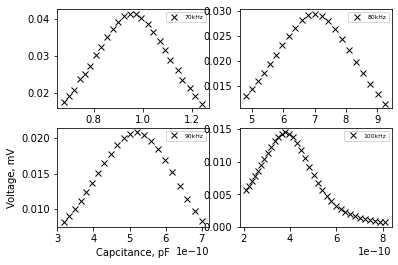

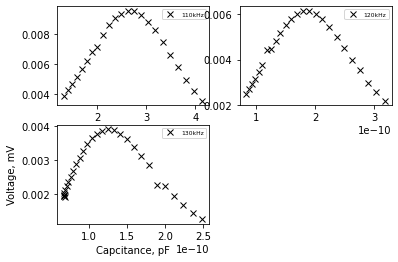

In [ ]:
# 4.1_plot_induvidual_resonance_curves

data_70_kHz = np.genfromtxt('4.1_70kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)
data_80_kHz = np.genfromtxt('4.1_80kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)
data_90_kHz = np.genfromtxt('4.1_90kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)
data_100_kHz = np.genfromtxt('4.1_100kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)
data_110_kHz = np.genfromtxt('4.1_110kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)
data_120_kHz = np.genfromtxt('4.1_120kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)
data_130_kHz = np.genfromtxt('4.1_130kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)

#70 kHz
voltage_70 = data_70_kHz[:, 0]
voltage_70_err = data_70_kHz[:, 1]
capacitance_70 = data_70_kHz[:, 2]
capacitance_70_err = data_70_kHz[:, 3]

#80 kHz
voltage_80 = data_80_kHz[:, 0]
voltage_80_err = data_80_kHz[:, 1]
capacitance_80 = data_80_kHz[:, 2]
capacitance_80_err = data_80_kHz[:, 3]

#90kHz
voltage_90 = data_90_kHz[:, 0]
voltage_90_err = data_90_kHz[:, 1]
capacitance_90 = data_90_kHz[:, 2]
capacitance_90_err = data_90_kHz[:, 3]

#100kHz
voltage_100 = data_100_kHz[:, 0]
voltage_100_err = data_100_kHz[:, 1]
capacitance_100 = data_100_kHz[:, 2]
capacitance_100_err = data_100_kHz[:, 3]

#110kHz
voltage_110 = data_110_kHz[:, 0]
voltage_110_err = data_110_kHz[:, 1]
capacitance_110 = data_110_kHz[:, 2]
capacitance_110_err = data_110_kHz[:, 3]

#120kHz
voltage_120 = data_120_kHz[:, 0]
voltage_120_err = data_120_kHz[:, 1]
capacitance_120 = data_120_kHz[:, 2]
capacitance_120_err = data_120_kHz[:, 3]

#130kHz
voltage_130 = data_130_kHz[:, 0]
voltage_130_err = data_130_kHz[:, 1]
capacitance_130 = data_130_kHz[:, 2]
capacitance_130_err = data_130_kHz[:, 3]

fig = plt.figure()
ax_70 = fig.add_subplot(221)
# ax_70.set_xlabel('Capcitance, pF')
# ax_70.set_ylabel('Voltage, mV')
#ax_70.set_title('70 kHz')
ax_70.errorbar(capacitance_70, voltage_70, label='70kHz', fmt='x', color='black')
plt.legend(fontsize='6')

ax_80 = fig.add_subplot(222)
# ax_80.set_xlabel('Capcitance, pF')
# ax_80.set_ylabel('Voltage, mV')
#ax_80.set_title('80 kHz')
ax_80.errorbar(capacitance_80, voltage_80, label='80kHz', fmt='x', color='black')
plt.legend(fontsize='6')

ax_90 = fig.add_subplot(223)
ax_90.set_xlabel('Capcitance, pF')
ax_90.set_ylabel('Voltage, mV')
#ax_90.set_title('90 kHz')
ax_90.errorbar(capacitance_90, voltage_90, label='90kHz', fmt='x', color='black')
plt.legend(fontsize='6')

ax_100 = fig.add_subplot(224)
# ax_100.set_xlabel('Capcitance, pF')
# ax_100.set_ylabel('Voltage, mV')
#ax_100.set_title('80 kHz')
ax_100.errorbar(capacitance_100, voltage_100, label='100kHz', fmt='x', color='black')
plt.legend(fontsize='6')

plt.savefig('4.1_resonance_curves_70-100.png', dpi = 600)
plt.show()



fig_2 = plt.figure()

ax_110 = fig_2.add_subplot(221)
ax_110.errorbar(capacitance_110, voltage_110, label='110kHz', fmt='x', color='black')
plt.legend(fontsize='6')

ax_120 = fig_2.add_subplot(222)
ax_120.errorbar(capacitance_120, voltage_120, label='120kHz', fmt='x', color='black')
plt.legend(fontsize='6')

ax_130 = fig_2.add_subplot(223)
ax_130.set_xlabel('Capcitance, pF')
ax_130.set_ylabel('Voltage, mV')
ax_130.errorbar(capacitance_130, voltage_130, label='130kHz', fmt='x', color='black')
plt.legend(fontsize='6')


plt.savefig('4.1_resonance_curves_110-130.png', dpi = 600)
plt.show()

[[1.08291704e+09 5.13000000e-07 1.93000000e+11 4.39810000e+01]
 [1.44396186e+09 9.12000000e-07 2.53000000e+11 5.02640000e+01]
 [1.89493943e+09 1.57000000e-06 3.20000000e+11 5.65470000e+01]
 [2.50362113e+09 2.74000000e-06 3.95000000e+11 6.28300000e+01]
 [3.75939850e+09 6.18000000e-06 4.78000000e+11 6.91130000e+01]
 [4.62695170e+09 9.36000000e-06 5.68000000e+11 7.53960000e+01]
 [6.93702703e+09 2.10000000e-05 6.67000000e+11 8.16790000e+01]]
Value of L:  [0.00812647]
With error:  [[5.48039234e-07]]


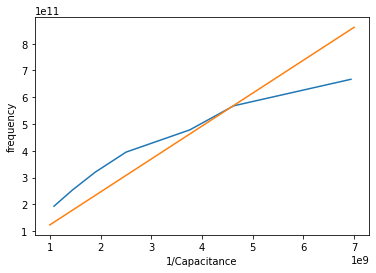

In [ ]:
# 4.1_plot_to_determine_L

data = np.genfromtxt('4.1_determine_L_data.csv', delimiter=',', skip_header=1)
print(data)

def function(x, coef_1):
    return (1/coef_1) * x

def fit(data):
    
    result = curve_fit(function, data[:, 0], data[:, 2], sigma = data[:, 3])

    fit_vals = result[0]
    cov = result[1]

    return fit_vals, cov
    

x = data[:, 0]
y = data[:, 2]
linspace = np.linspace(1E9, 7E9, 100)

L, cov = fit(data)
print('Value of L: ', L)
print('With error: ', cov)

fit_func = (1/L) * linspace

fig = plt.figure()
ax_1 = fig.add_subplot(111)

ax_1.set_xlabel('1/Capacitance')
ax_1.set_ylabel('frequency')
 
ax_1.plot(x, y)
ax_1.plot(linspace, fit_func)
plt.show()

3rd order fit polynomial coefficients: 0.001046, -0.023077, -25.439342, 1797.176830
fit error: 0.437233 on each point


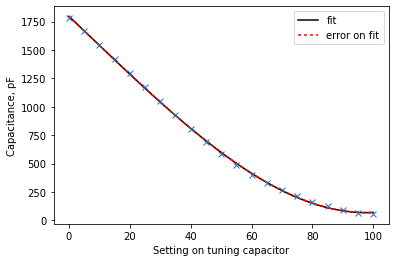

In [ ]:
# fit_capacitor_calibration

cals = np.genfromtxt('capacitor_calibration_data.txt', delimiter='	', skip_header=1)

def function(x, coef_1, coef_2, coef_3, coef_4):


    return coef_1 * x**3 + coef_2 * x**2 + coef_3 * x + coef_4


def fit_to_data(data):

    result = curve_fit(function, data[:, 0], data[:, 1])

    fit_vals = result[0]
    cov = result[1]

    return fit_vals, cov


x = np.linspace(0, 100, 10000)


fit_vals, cov_matrix = fit_to_data(cals)
print('3rd order fit polynomial coefficients: {0:f}, {1:f}, {2:f}, {3:f}'.format(fit_vals[0], fit_vals[1], fit_vals[2], fit_vals[3]))

fit = fit_vals[0] * x**3 + fit_vals[1] * x**2 + fit_vals[2] * x + fit_vals[3]

fit_error = np.sqrt(cov_matrix[0][0]**2 + cov_matrix[1][1]**2 + cov_matrix[2][2]**2)
print('fit error: {:f} on each point'.format(fit_error))

settings_array = np.arange(0, 101)

calibrations_array = function(settings_array, fit_vals[0], fit_vals[1], fit_vals[2], fit_vals[3])


calibrations_file = open('Fitted_calibration_data.csv', 'w')

for index in range(101):

    print('{0:f},{1:f}'.format(settings_array[index], calibrations_array[index]), file=calibrations_file)
    
calibrations_file.close()


fig = plt.figure()
ax_1 = fig.add_subplot(111)

ax_1.set_xlabel('Setting on tuning capacitor')
ax_1.set_ylabel('Capacitance, pF')

ax_1.errorbar(cals[:, 0], cals[:, 1], fmt='x')
ax_1.plot(x, fit, color='black', label='fit')
ax_1.plot(x, fit + fit_error, dashes=[2,2], color='red', label='error on fit')
ax_1.plot(x, fit - fit_error, dashes=[2,2], color='red')
plt.legend()
plt.savefig('capacitor_calibration_fit.png', dpi=600)
plt.show()

C:\Users\vanag\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


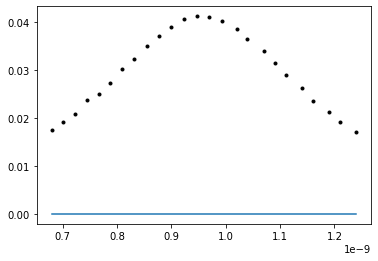

In [ ]:
# proof that gaussian fit returns sth awful

def gaussian(x, amp, center, width):
    return amp * np.exp(-((x - center) ** 2) / (width))

data = np.genfromtxt(
    "4.1_70kHz_resonance_curve_data.csv", delimiter=",", skip_header=1
)

x = data[:, 2]
y = data[:, 0]
e = data[:, 1]
plt.errorbar(x, y, e, fmt=".k")

popt, pcov = curve_fit(gaussian, x, y, sigma=e)

plt.plot(x, gaussian(x, popt[0], popt[1], popt[2]))

0.8664317582352274


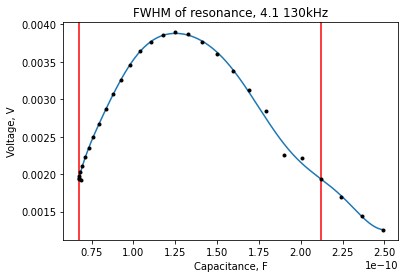

In [ ]:
# fit of each resonance curve, stick to 10th order poly

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

data = np.genfromtxt('4.1_130kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)

x = data[:, 2]
y = data[:, 0]
e = data[:, 1]
plt.errorbar(x,y,e,fmt='.k')


fit = np.polyfit(x, y, 10, w=1/e)
x_2 = np.linspace(np.min(x), np.max(x), 10000)
y_2 = np.polyval(fit,x_2)
plt.plot(x_2, y_2)

max_index = np.argmax(y_2)
half_1 = y_2[:max_index]
half_2 = y_2[max_index:]

half_maximum = np.max(y_2) / 2

first_index = np.where(half_1 == find_nearest(half_1, half_maximum))[0][0]
second_index = len(half_1 ) + np.where(half_2 == find_nearest(half_2, half_maximum))[0][0]

plt.axvline(x_2[first_index], c='r')
plt.axvline(x_2[second_index], c='r')

plt.title('FWHM of resonance, 4.1 130kHz')
plt.xlabel('Capacitance, F')
plt.ylabel('Voltage, V')

plt.savefig('4.1 FWHM 130kHz.png', dpi = 400)

Q = x_2[max_index] / (x_2[second_index] - x_2[first_index])
print(Q)

In [ ]:
# find C_r

data = np.genfromtxt('4.1_130kHz_resonance_curve_data.csv', delimiter=',', skip_header=1)

x = data[:, 2]
y = data[:, 0]
e = data[:, 1]

max_index = np.argmax(y)
C_r = x[max_index]
C_r

1.24958e-10

R = 3618.8555017327867 +- 112.53476236397182


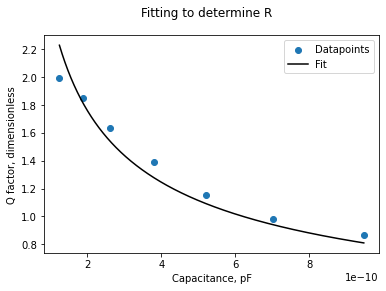

In [ ]:
# equation Q = sqrt(L/C_r) / R , determine R


def function(x, R):
    return x / R 


L = 0.00812647
L_e = 5.48039234e-07

# f = [70, 80, 90, 100, 110, 120, 130]; from a 10th order polyfit:

Q = np.array(
    [
        1.9951600769037863,
        1.8517721055100274,
        1.6331070303813848,
        1.3901771573040727,
        1.15555521296540655,
        0.9777633833211851,
        0.8664317582352274,
    ]
)

# C_r = np.array(
#     [
#         9.47e-10,
#         7.01014e-10,
#         5.20904e-10,
#         3.80577e-10,
#         2.62204e-10,
#         1.89766e-10,
#         1.24958e-10,
#     ]
# )

#smh needed to rewrite this inversely

C_r = np.array(
    [
        1.24958e-10,
        1.89766e-10,
        2.62204e-10,
        3.80577e-10,
        5.20904e-10,
        7.01014e-10,
        9.47e-10,
    ]
)


x = np.sqrt(L / C_r)

R, pcov = curve_fit(function, x, Q)

R = R[0]

print('R = ' + str(R) + ' +- ' + str(np.sqrt(np.diag(pcov))[0]))

# plt.plot(C_r, Q)
# plt.scatter(C_r, np.sqrt(L/C_r)/ R)

fig = plt.figure()
ax_1 = fig.add_subplot(111)
fig.suptitle('Fitting to determine R', fontsize=12)

ax_1.set_xlabel('Capacitance, pF')
ax_1.set_ylabel('Q factor, dimensionless')


C_r_linspace = np.linspace(np.min(C_r), np.max(C_r), 1000)

ax_1.scatter(C_r, Q, label='Datapoints')
ax_1.plot(C_r_linspace, np.sqrt(L/C_r_linspace)/ R, color='black', label='Fit')
plt.legend()
plt.savefig('R fitting.png', dpi=600)
plt.show()


In [ ]:
# R = 3618.8555017327867 +- 112.53476236397182